# Insitu Clustering
https://www.youtube.com/watch?v=PX5nSBGB5Tw&t=29s

In [102]:
library(tidyverse)
library(DataExplorer)
library(grid)
library(gridExtra)
library(ggpubr)
library(viridis)
library(readxl)
library(ggrepel)
library(magrittr)
library(ggsci)
options(repr.plot.width=6, repr.plot.height=4,repr.plot.res =300)

In [3]:
R.Version()

$platform
[1] "x86_64-w64-mingw32"

$arch
[1] "x86_64"

$os
[1] "mingw32"

$system
[1] "x86_64, mingw32"

$status
[1] ""

$major
[1] "3"

$minor
[1] "6.1"

$year
[1] "2019"

$month
[1] "07"

$day
[1] "05"

$`svn rev`
[1] "76782"

$language
[1] "R"

$version.string
[1] "R version 3.6.1 (2019-07-05)"

$nickname
[1] "Action of the Toes"

In [5]:
df <- read.csv("facility_2015_2019_v2.csv")
head(df)

,Year,ProductionMonth,UID,CondINJ,Flare,Fuel,FuelINJ,GasConfidential,Method,Oil,Operation,Operator,Region,SOR,Scheme,SolutionGas,SteamINJ,Vent
,<int>,<fct>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>
1,2018,2018-04,17,NA,18.3,4552,NA,321.7,CSS,5217,CNULPR,Canadian Natural Upgrading Limited,Peace River,7.587402,PeaceRiver,551.3,39581.2,NA
2,2015,2015-02,16,NA,112.3,10040,NA,NA,SAGD,5331,PGFLB,Pengrowth,Cold Lake,22.289203,Lindbergh,1276.2,118828.2,NA
3,2019,2019-07,17,NA,59.1,6586,NA,314.7,CSS,5376,CNULPR,Canadian Natural Upgrading Limited,Peace River,13.804461,PeaceRiver,768.3,74211.4,NA
4,2018,2018-11,17,NA,4.9,7756,NA,401.4,CSS,6567,CNULPR,Canadian Natural Upgrading Limited,Peace River,11.913395,PeaceRiver,1141.7,78230.5,NA
5,2015,2015-04,8,NA,16.1,16148,NA,NA,SAGD,7803,HSESR,Husky,Athabasca,23.503505,Sunrise,117.4,183395.5,NA
6,2019,2019-01,17,NA,4.6,7751,NA,349.0,CSS,8064,CNULPR,Canadian Natural Upgrading Limited,Peace River,8.817989,PeaceRiver,921.4,71106.5,NA


In [6]:
df_clustering <- df %>% select(Oil,SteamINJ,SolutionGas,Method,Region)
head(df_clustering)

,Oil,SteamINJ,SolutionGas,Method,Region
,<int>,<fct>,<dbl>,<fct>,<fct>
1,5217,39581.2,551.3,CSS,Peace River
2,5331,118828.2,1276.2,SAGD,Cold Lake
3,5376,74211.4,768.3,CSS,Peace River
4,6567,78230.5,1141.7,CSS,Peace River
5,7803,183395.5,117.4,SAGD,Athabasca
6,8064,71106.5,921.4,CSS,Peace River


In [10]:
df_clustering$Oil <- as.numeric(df_clustering$Oil)
df_clustering$SteamINJ <- as.numeric(df_clustering$SteamINJ)
df_clustering$SolutionGas <- as.numeric(df_clustering$SolutionGas)

In [11]:
sum(is.na(df_clustering))

[1] 0

In [12]:
cluster_feature <- df_clustering[,1:3]
head(cluster_feature)

,Oil,SteamINJ,SolutionGas
,<dbl>,<dbl>,<dbl>
1,5217,860,551.3
2,5331,46,1276.2
3,5376,1050,768.3
4,6567,1067,1141.7
5,7803,283,117.4
6,8064,1040,921.4


In [13]:
# Scale data
feature_scale <- scale(cluster_feature)
head(feature_scale)

Oil,SteamINJ,SolutionGas
-0.9708361,0.9094228,-0.5856261
-0.9704683,-1.5914899,-0.5134744
-0.9703232,1.4931739,-0.5640274
-0.9664812,1.5454042,-0.5268616
-0.9624940,-0.8633372,-0.6288137
-0.9616521,1.4624501,-0.5487888


In [15]:
summary(feature_scale)

      Oil             SteamINJ        SolutionGas      
 Min.   :-0.9708   Min.   :-1.7297   Min.   :-0.63884  
 1st Qu.:-0.7723   1st Qu.:-0.8649   1st Qu.:-0.56427  
 Median :-0.4695   Median : 0.0000   Median :-0.47203  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.8443   3rd Qu.: 0.8649   3rd Qu.: 0.02484  
 Max.   : 2.7156   Max.   : 1.7297   Max.   : 4.16329  

In [16]:
fitK <- kmeans(feature_scale,3)
fitK

K-means clustering with 3 clusters of sizes 146, 442, 539

Cluster means:
        Oil   SteamINJ SolutionGas
1  1.517117 -0.1054498   2.2253555
2  0.214442 -0.9473131  -0.1264325
3 -0.586795  0.8053953  -0.4991072

Clustering vector:
   [1] 3 2 3 3 2 3 2 2 3 2 3 2 2 2 3 2 2 3 2 2 2 3 3 2 2 3 3 2 2 2 2 2 2 2 2 2 2
  [38] 2 2 2 2 2 3 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [75] 2 2 2 2 2 2 2 3 3 3 2 3 2 3 3 3 3 3 2 2 2 2 2 2 2 2 3 2 2 3 2 3 2 2 2 2 2
 [112] 3 3 2 2 2 2 2 2 2 2 3 3 2 3 2 2 2 3 2 2 2 2 2 2 2 2 2 3 3 2 2 3 2 2 2 2 2
 [149] 2 2 2 3 2 2 2 2 2 2 2 2 3 3 2 2 3 3 2 2 3 3 2 2 3 2 3 2 2 2 2 3 2 2 2 2 2
 [186] 3 2 2 3 2 2 3 3 3 2 3 2 3 2 3 3 2 3 3 3 2 3 2 2 2 3 3 3 3 3 2 3 3 3 3 3 3
 [223] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 2 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 2
 [260] 2 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 2 2 3 3 2 2 2 2 2 2 3 2 2 3 2 2 2 2 3
 [297] 2 3 2 2 3 3 2 2 3 3 3 2 3 3 3 2 3 3 3 2 2 2 2 3 3 3 2 3 2 2 3 3 3 2 3 3 3
 [334] 3 3 3 2 2 2 3 3 3 3 2 3 3 3 3 

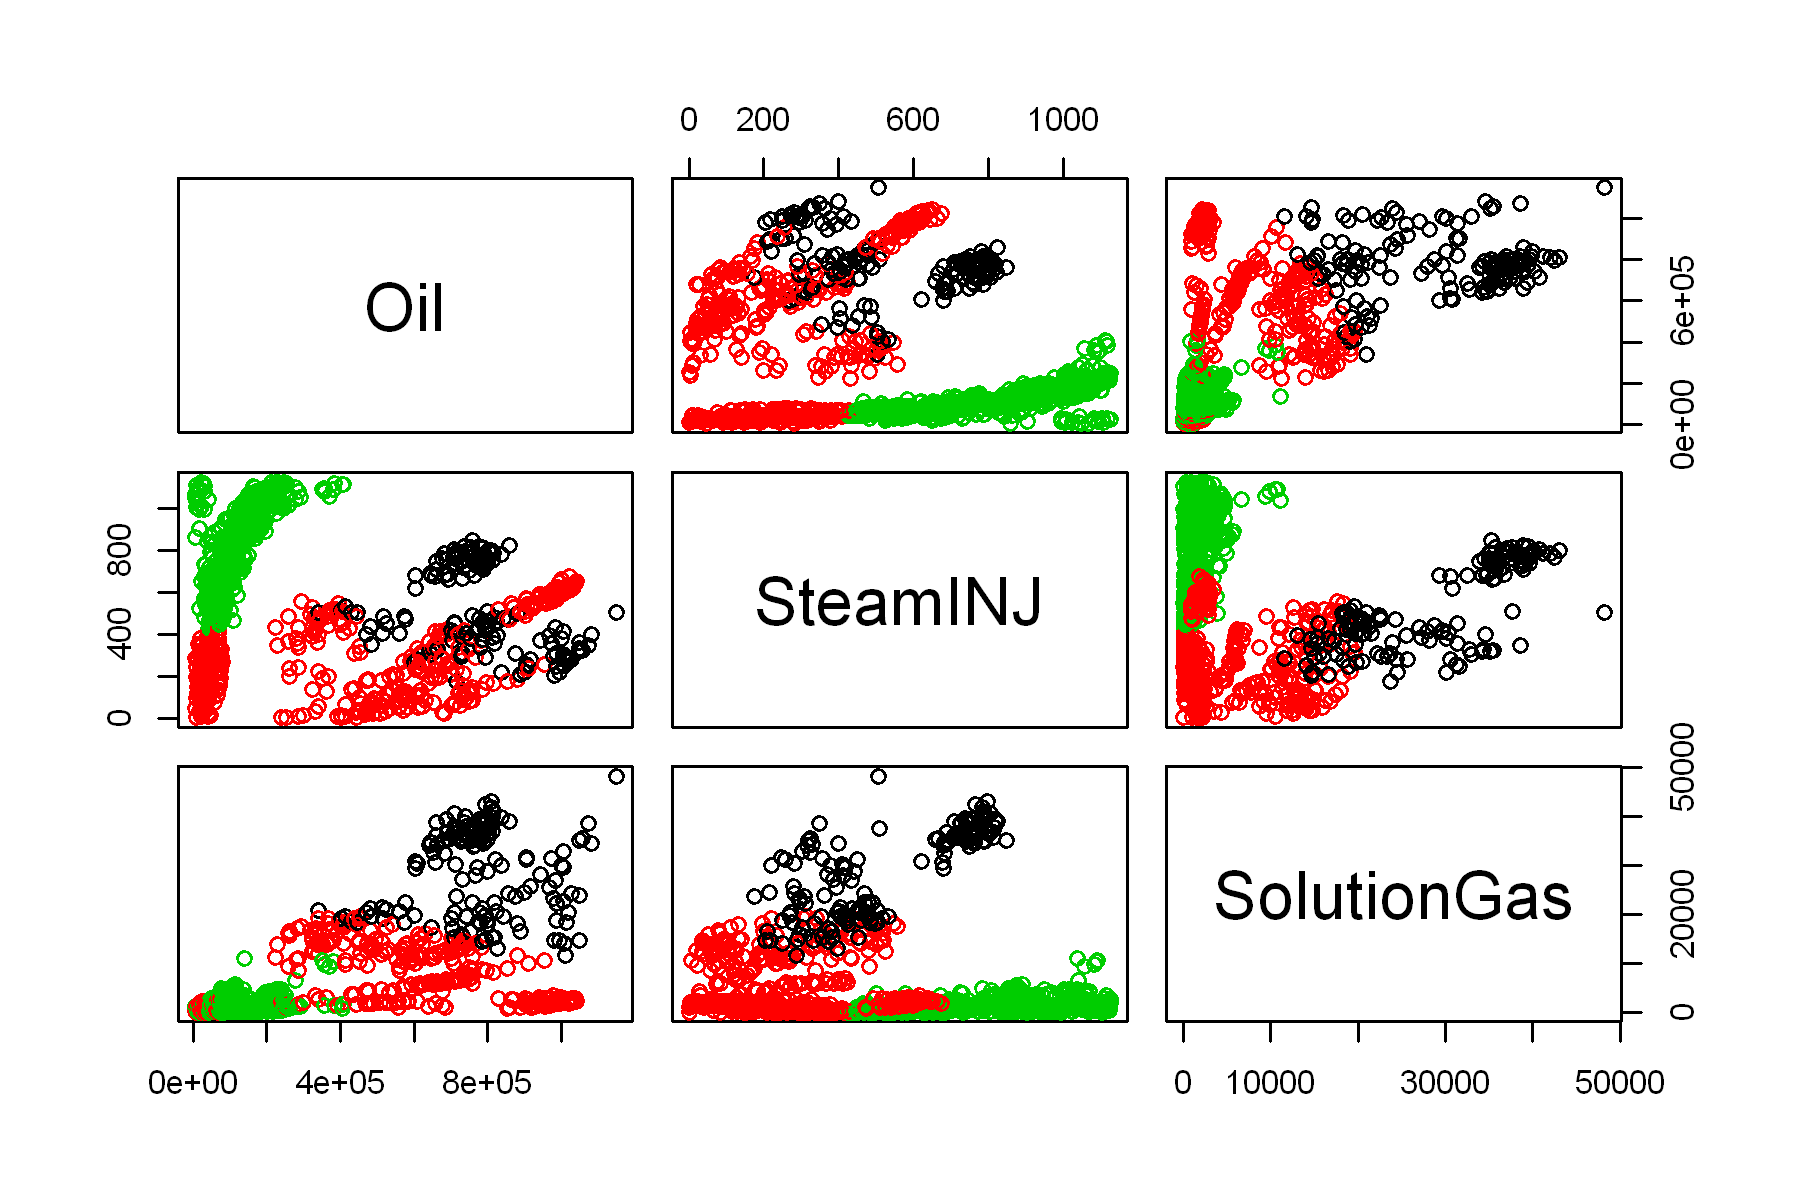

In [19]:
plot(df_clustering[,-(4:5)],col=fitK$cluster)

In [23]:
# Try different k
k <- list()
for(i in 1:20){
  k[[i]] <- kmeans(feature_scale, i)
}


In [24]:
k

[[1]]
K-means clustering with 1 clusters of sizes 1127

Cluster means:
           Oil     SteamINJ   SolutionGas
1 2.088441e-17 1.834774e-16 -1.922942e-16

Clustering vector:
   [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [260] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [297] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [334] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [371] 1 1 1 1 

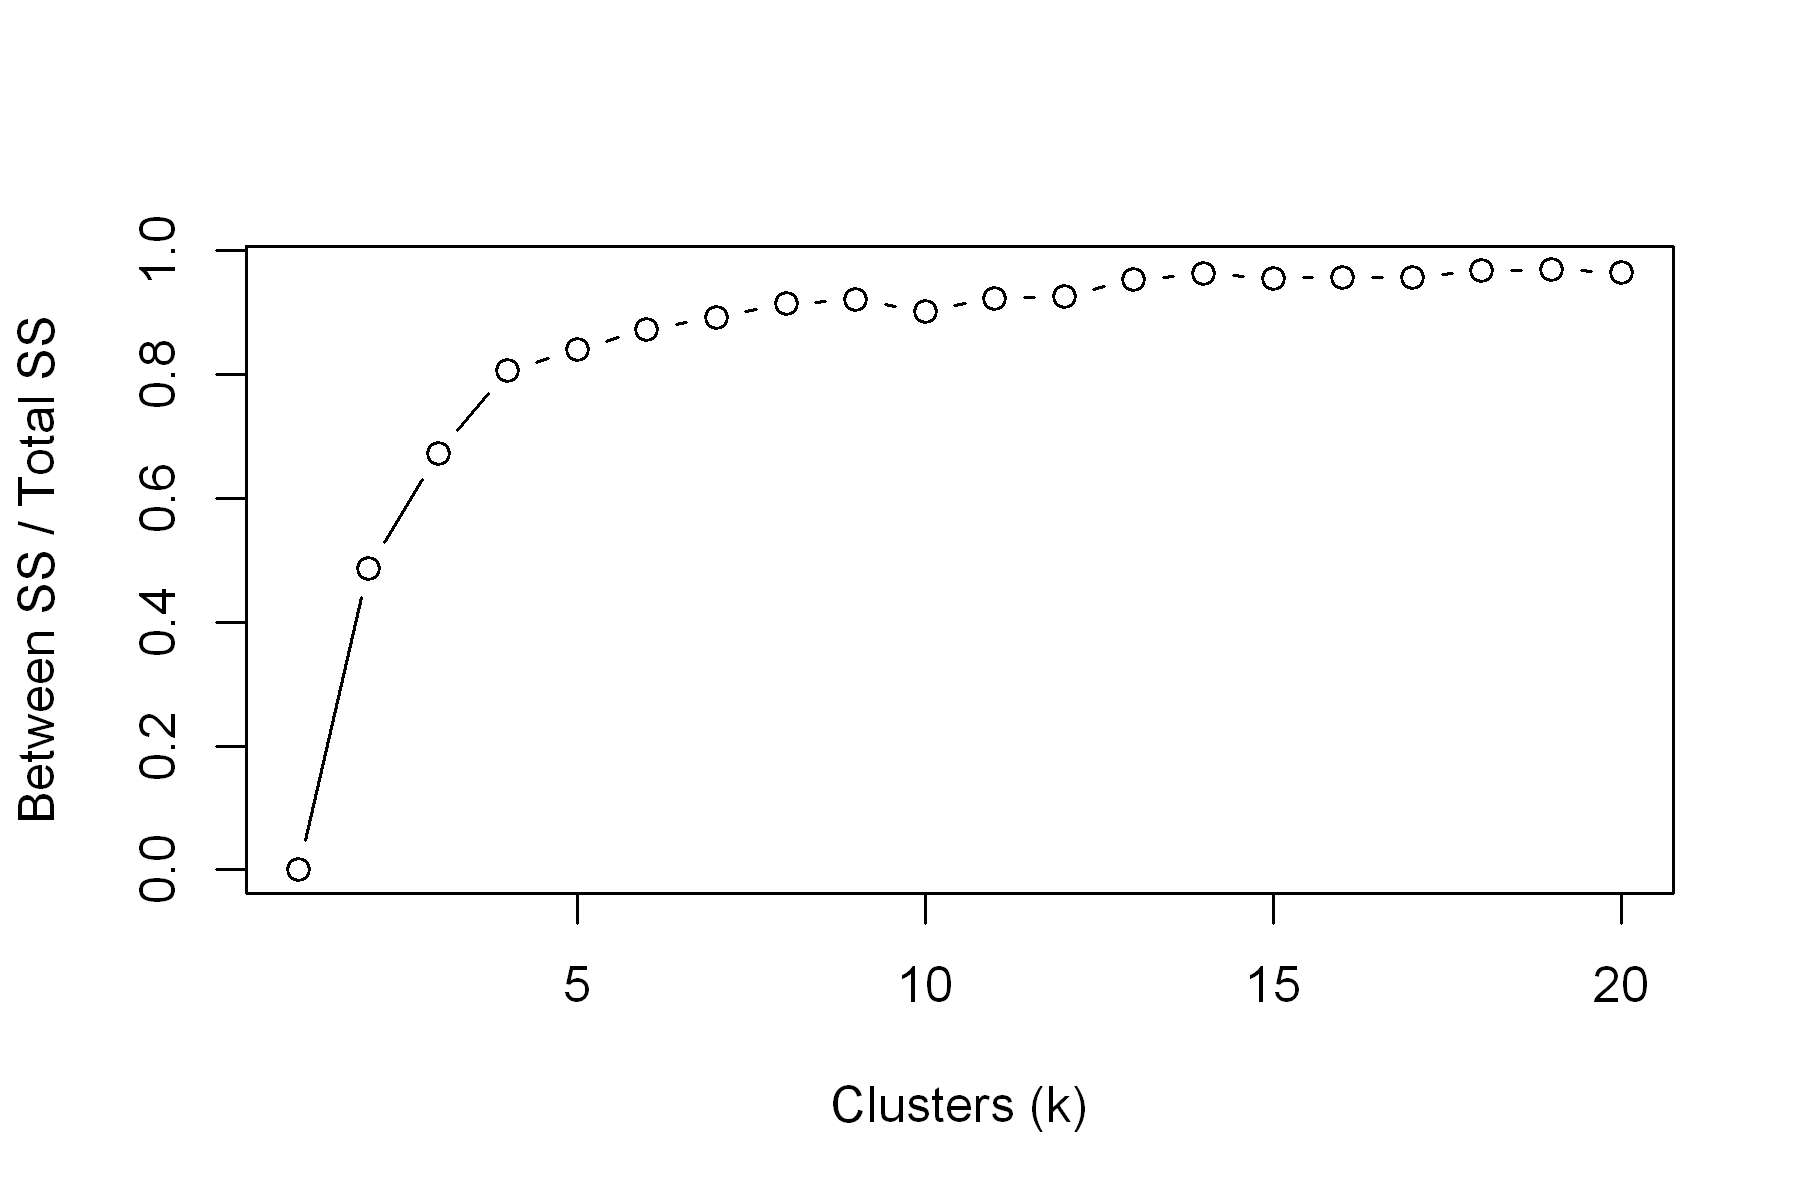

In [26]:
# Between Sum of square, total sum of square
betweenss_totss <- list()
for(i in 1:20){
  betweenss_totss[[i]] <- k[[i]]$betweenss/k[[i]]$totss
}

plot(1:20, betweenss_totss, type = "b", 
     ylab = "Between SS / Total SS", xlab = "Clusters (k)")

In [29]:
k_14 = k[[14]]
k_14

K-means clustering with 14 clusters of sizes 62, 57, 50, 56, 37, 53, 147, 47, 33, 98, 125, 124, 106, 132

Cluster means:
          Oil    SteamINJ SolutionGas
1   1.4444158  0.55624840   3.0556557
2   0.2269455 -0.42409545   1.0097750
3   0.8155699 -1.45089801   0.6615166
4   1.2132364 -0.95627648   0.1093807
5   0.5461616 -1.49707663  -0.3909824
6   2.1059151  0.04185385  -0.4259832
7  -0.7548630  0.19786508  -0.5287154
8   1.6214907 -0.67500716   1.0374574
9   1.8994977 -0.67676025   2.2653962
10 -0.2526102  1.55371219  -0.4173722
11 -0.8694641 -1.31069943  -0.5126353
12 -0.6532662  0.80828220  -0.4559670
13 -0.8241922 -0.55847648  -0.5890153
14 -0.5238736  1.24601068  -0.5379204

Clustering vector:
   [1] 12 11 14 14 13 14 11 11 14 11 14 11 11 11 14 13 13 14 11 11 11 12 14 11
  [25] 11  7 14 13 13 11 13 13 11 11 11 13 11 11 11 11 13 11  7 11 11 14 14 11
  [49] 11 11 11 11 11 11 11 11 11 11 11 11 11 13 11 11 11 11 11 11 11 11 11 11
  [73] 11 11 11 11 11 11 11 11 11 14 14 14 11  7 11 

In [30]:
k_14$cluster

[1] 12 11 14 14 13 14 11 11 14 11 14 11 11 11 14 13 13 14 11 11 11 12 14 11
  [25] 11  7 14 13 13 11 13 13 11 11 11 13 11 11 11 11 13 11  7 11 11 14 14 11
  [49] 11 11 11 11 11 11 11 11 11 11 11 11 11 13 11 11 11 11 11 11 11 11 11 11
  [73] 11 11 11 11 11 11 11 11 11 14 14 14 11  7 11  7  7  7 13 14 11 11 11 11
  [97] 11 11 11 11  7 13 13  7 13  7 13 11 11 11 11  7  7 11 11 11 11 11 13 11
 [121] 11  7  7 11  7 11 11 13  7 13 11 13 13 11 13 11 11 11  7 12 11 11  7 11
 [145] 13 13 11 11 11 13 13  7 13 11 13 13 13 11 13 13 14  7 13 13  7  7 13 13
 [169] 13  7 13 11  7 11 13 13 11 11 13 13 13 13 11 11 13 13 13 11 13 13 13 13
 [193] 13  7 13 13 13 13 11 13 13 11 13  7 13 11 13 11 11 13 12 13  7 13 13 11
 [217] 13 13 13 13  7 13  7  7 12  7  7 12  7 12 12  7  7  7 12  7  7  7  7 13
 [241]  7  7 11  7  7  7 12 11 11  7  7  7 12  7  7  7  7  7 13 11 12  7 13  7
 [265]  7  7  7  7  7  7  7 13  7  7  7  7  7 11 11 13  7 13 13 11 13 13 11 12
 [289] 13 13  7 11 13 13 11  7 13  7 13 13  7  7 11 13 13 13  7 11  7 12  7 13
 [313] 13  7 12 11 11 13 11  7  7 12 11  7 13 11  7 12 12 13 13 13  7  7 12  7
 [337] 13 11 13 14  7  7  7 13 13 12 12 12 13 12 13  7  7  7  7 13 12 13  7  7
 [361] 12 12  7 12 13  7  7  7 12 13  7 12  7  7  7  7  7  7  7 12  7  7  7 14
 [385]  7 12  7  7  7  7  7  7 12 12  7  7  7 12 12 12  7 12  7 12  7  7  7 12
 [409] 12  7 14 12  7  7 12  7 12  7 12 12 12 12 12 12  7 12 12 12  7 12 12 12
 [433] 12 14 12 12  7  7 12  7 12 12 12  7 12  7 12 14 12 14  7  7 12 12 12 12
 [457] 12 13 12 12  7 12 12 12 12 12 12 12 14  7  7 14 12 12  7 12 14  7 14  7
 [481] 12 14 12 12 12 12 12 12 12 14 12 12 12 14 12 14 14 12 14  7 12 14 12 12
 [505] 12  7 12 12 14 12  7  7 14 12 14 14 12 14 12 12 14 14 12 14 12  7 14 14
 [529] 12 10 12 12 14 12 12 14 12 12 12 12 12 14 14 12 14 10 12 10 14 14 14 12
 [553] 14 14 14 14 14 14 14 14 12 14 14 14 10 10 14 10 14 14 14 14 10 14 14 10
 [577] 12 14 14 14 10 14 14 14 14 14 14 12 10 10 14 14 14 14 14 14 14 14 14 14
 [601] 14 14 14 14 14 14 14 14 10 14 10 14 14 14 14 14 14 14 14 14 14 14 14 14
 [625] 14 10 14 10 14 14 14 14 14 14 14 14 14 14 14 14 10 14 14 10 10 10 14 10
 [649] 10 10 10 10 10 14 14 10 10 14 10 10 10 10 10 10 10 10 14 10 10 10 10 10
 [673] 10 10 10 10 10 10 10 10 10 10 10 10 10  2 10 10 10 10 10 10 10 14 10 10
 [697] 10  2 10 10 10 10 10 10 10 10 10 10 10 11 10 10 10 10 10 10 10 10  5 10
 [721]  2  2 10 10 10  2  2 10 10  2  2  5  2  2  2 10 10  2  5  2  2  2  2  3
 [745]  2  2  2  5  2  2  2  2  5  2  2  2  3 10 10 10  5  2  2  2  2 10  2  2
 [769]  2 10 10  2  5  2  2  2  5  5 10  2  2  2 10  2  3  3  2  2  5  2  5  2
 [793]  5  5  2  3  3  3  2  2  3  5  5  2  5  3  3  5  3  5  5  5  3  5  3  2
 [817]  3  3  2  5  3  3  5  5  3  2  3  2  5  3  3  2  3  5  5  3  5  5  3  5
 [841]  5  3  2  3  3  3  4  3  4  5  3  2  3  2  3  3  5  5  4  4  4  8  1  4
 [865]  1  4  3  4  5  9  3  4  4  3  4  3  4  4  4  3  4  3  5  4  9  4  1  1
 [889]  8  4  4  9  4  4  4  8  3  4  4  1  4  4  1  1  4  9  4  3  4  4  4  5
 [913]  1  4  1  3  1  4  4  1  4  1  1  4  3  4  8  8  3  4  8  1  3  8  1  8
 [937]  1  1  9  4  1  8  4  1  3  8  4  8  3  4  1  8  1  1  9  8  1  8  4  3
 [961]  1  4  3  1  3  1  8  4  8  4  4  1  8  1  4  1  4  4  4  8  1  1  1  1
 [985]  8  9  1  1  1  9  8  8  1  1  8  1  1  8  4  8  1  8  1  1  1  1  1  1
[1009]  8  1  8  1  4  1  1  9  8  8  1  1  1  1  1  1  1  8  4  1  8  8  9  8
[1033]  8  6  1  9  8  6  4  9  1  6  6  6  9  8  8  8  6  9  6  6  9  9  6  6
[1057]  6  4  9  6  6  6  6  6  6  6  6  9  6  8  6  6  6  6  6  9  6  6  6  9
[1081]  6  6  6  6  9  6  8  9  9  6  8  6  6  6  6  8  6  6  6  9  6  6  9  6
[1105]  9  9  8  8  8  6  8  6  6  6  9  6  6  6  6  6  9  9  8  9  9  9  1

In [31]:
df_clustering['k_14'] = k_14$cluster
head(df_clustering)

,Oil,SteamINJ,SolutionGas,Method,Region,k_14
,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<int>
1,5217,860,551.3,CSS,Peace River,12
2,5331,46,1276.2,SAGD,Cold Lake,11
3,5376,1050,768.3,CSS,Peace River,14
4,6567,1067,1141.7,CSS,Peace River,14
5,7803,283,117.4,SAGD,Athabasca,13
6,8064,1040,921.4,CSS,Peace River,14


In [32]:
write_csv(df_clustering,"df_clustering_KMean.csv")

In [33]:
df['k_14'] = k_14$cluster
head(df)

,Year,ProductionMonth,UID,CondINJ,Flare,Fuel,FuelINJ,GasConfidential,Method,Oil,Operation,Operator,Region,SOR,Scheme,SolutionGas,SteamINJ,Vent,k_14
,<int>,<fct>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<int>
1,2018,2018-04,17,NA,18.3,4552,NA,321.7,CSS,5217,CNULPR,Canadian Natural Upgrading Limited,Peace River,7.587402,PeaceRiver,551.3,39581.2,NA,12
2,2015,2015-02,16,NA,112.3,10040,NA,NA,SAGD,5331,PGFLB,Pengrowth,Cold Lake,22.289203,Lindbergh,1276.2,118828.2,NA,11
3,2019,2019-07,17,NA,59.1,6586,NA,314.7,CSS,5376,CNULPR,Canadian Natural Upgrading Limited,Peace River,13.804461,PeaceRiver,768.3,74211.4,NA,14
4,2018,2018-11,17,NA,4.9,7756,NA,401.4,CSS,6567,CNULPR,Canadian Natural Upgrading Limited,Peace River,11.913395,PeaceRiver,1141.7,78230.5,NA,14
5,2015,2015-04,8,NA,16.1,16148,NA,NA,SAGD,7803,HSESR,Husky,Athabasca,23.503505,Sunrise,117.4,183395.5,NA,13
6,2019,2019-01,17,NA,4.6,7751,NA,349.0,CSS,8064,CNULPR,Canadian Natural Upgrading Limited,Peace River,8.817989,PeaceRiver,921.4,71106.5,NA,14


In [34]:
write_csv(df,"df_KMean.csv")

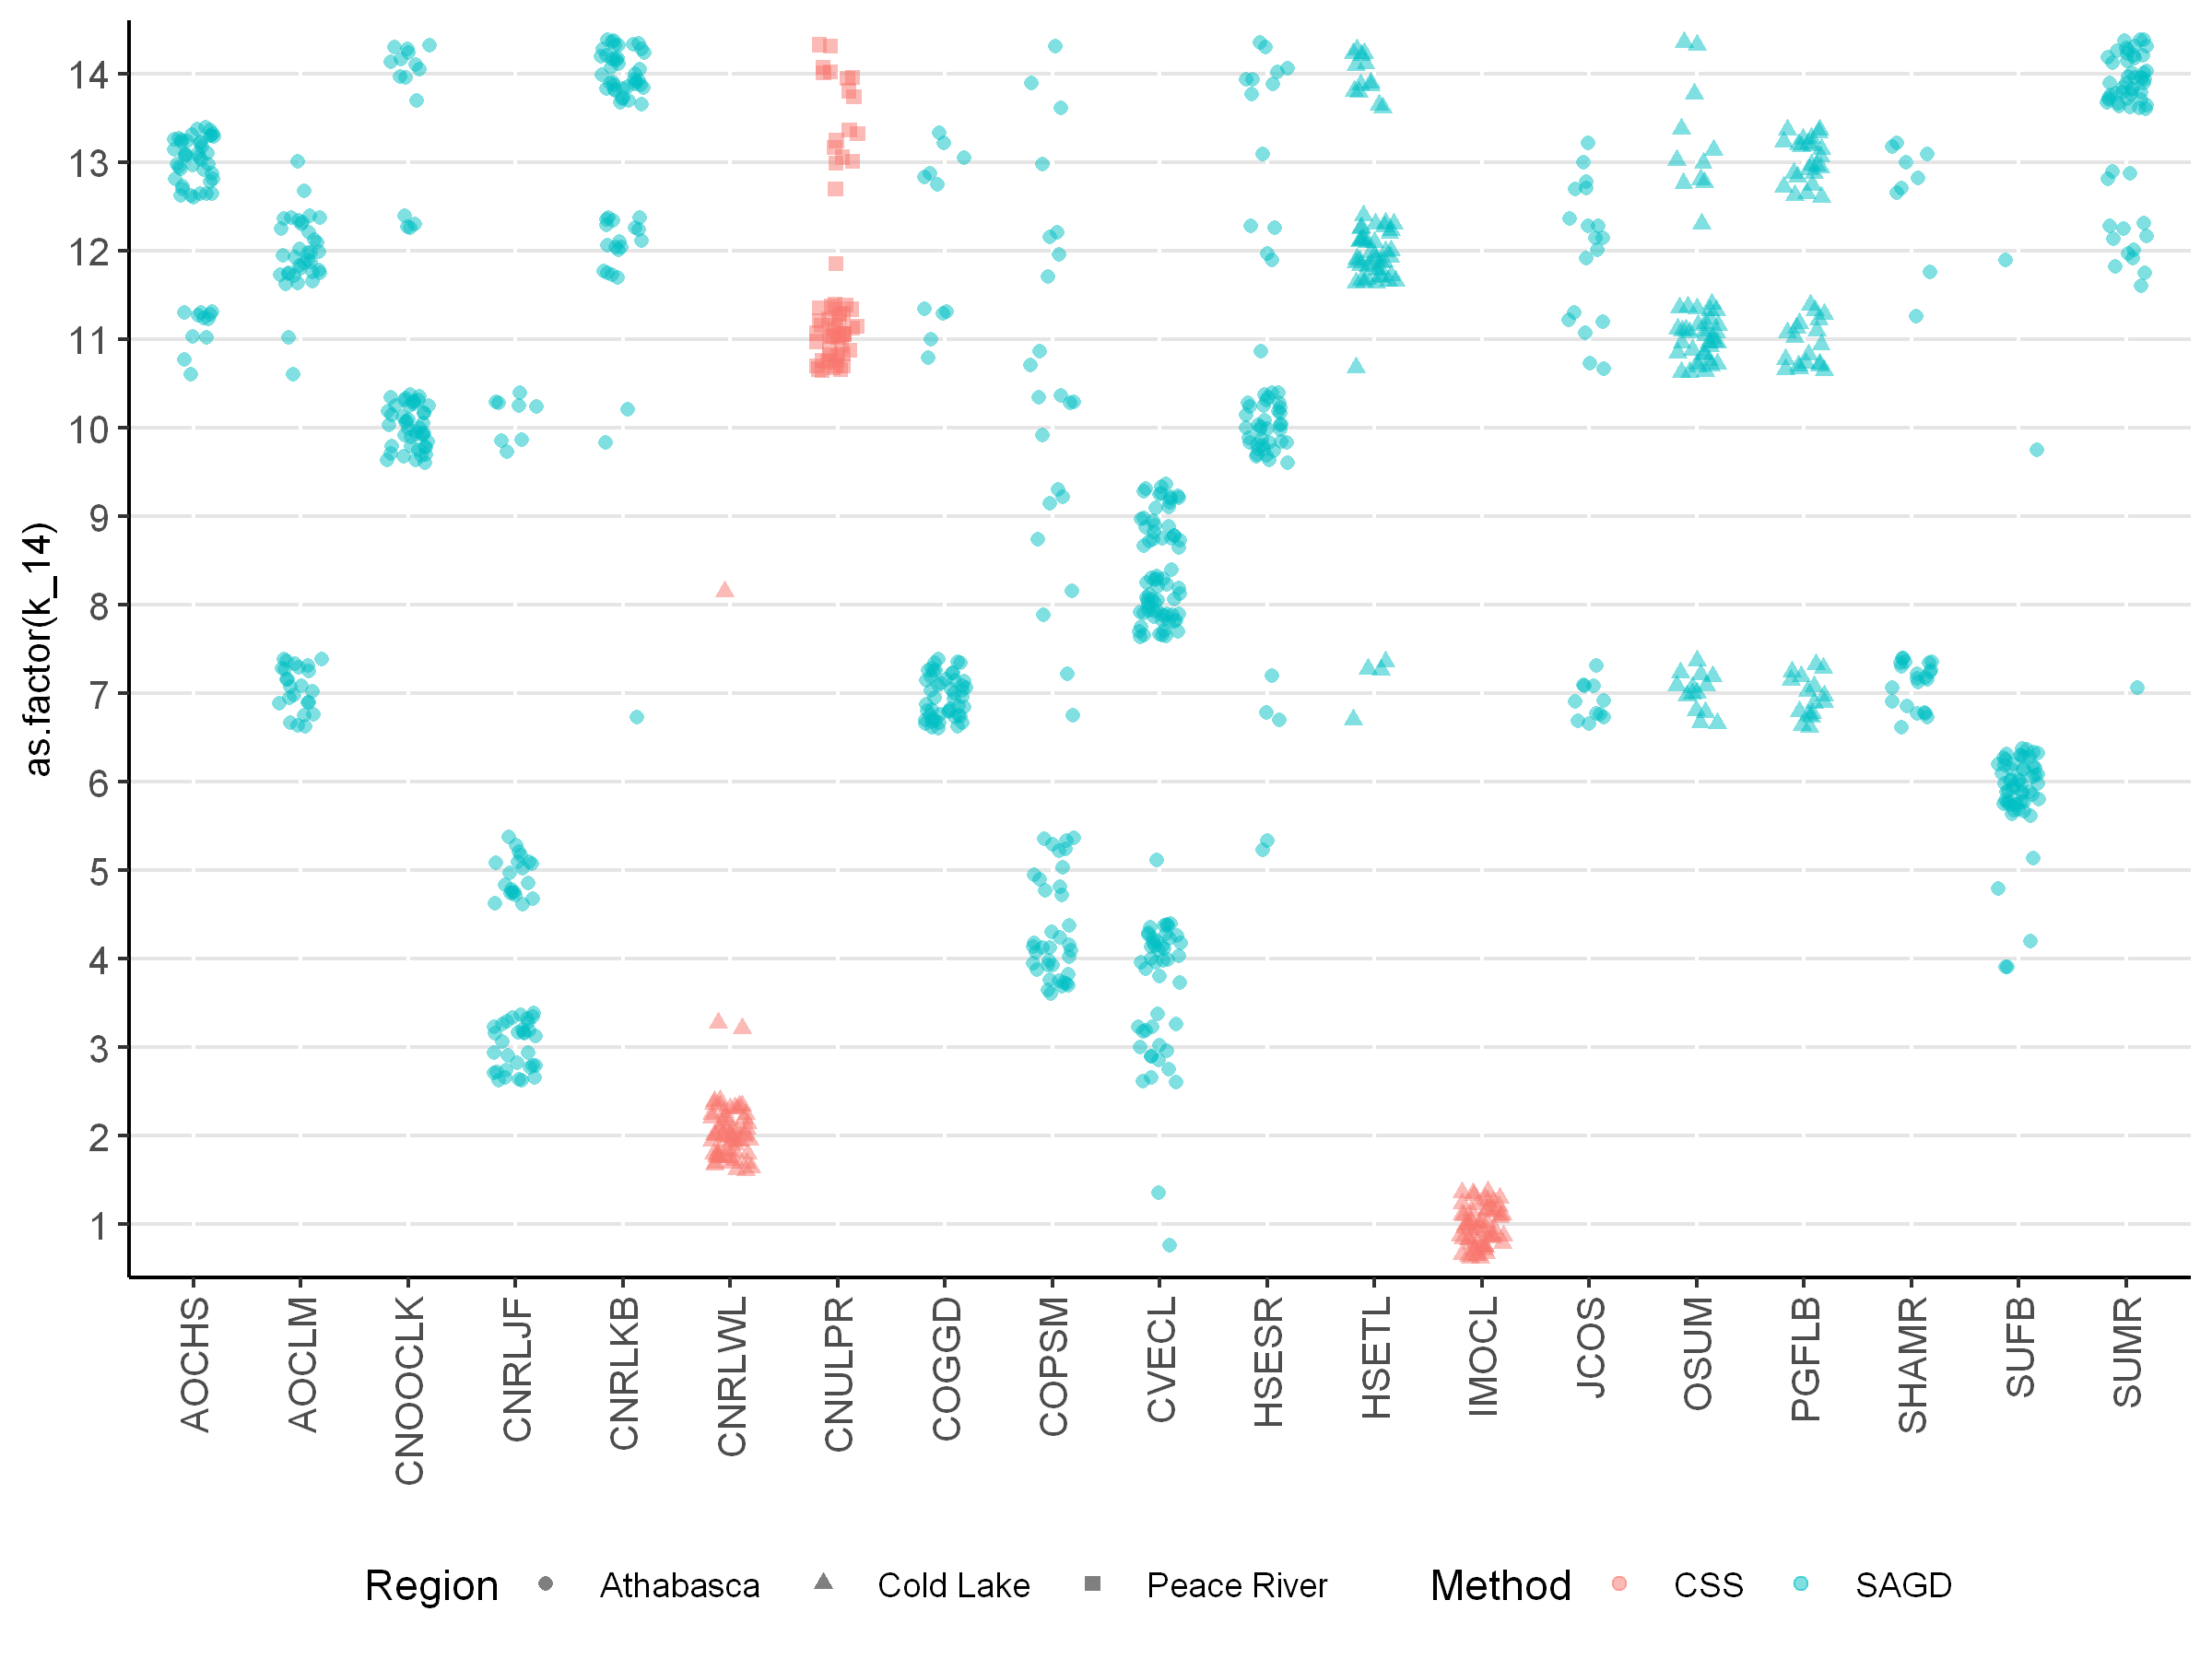

In [90]:
options(repr.plot.width=8, repr.plot.height=6,repr.plot.res =300)
ggplot(df, aes(Operation,as.factor(k_14)))+geom_jitter(alpha = 0.5,width = 0.2, aes(color = Method, shape = Region))+
            theme(axis.text.x = element_text(angle = 90, hjust = 1,vjust =0.5),
                  axis.title.x = element_blank(),
                  axis.text = element_text(size = 10), 
                  axis.title = element_text(size = 10),
                  panel.background = element_rect(fill = "white"),
                  axis.line = element_line(size = 0.5),
                  legend.key = element_blank(),
                  legend.position = "bottom",
                  panel.grid.major.y = element_line(color = "grey90"))

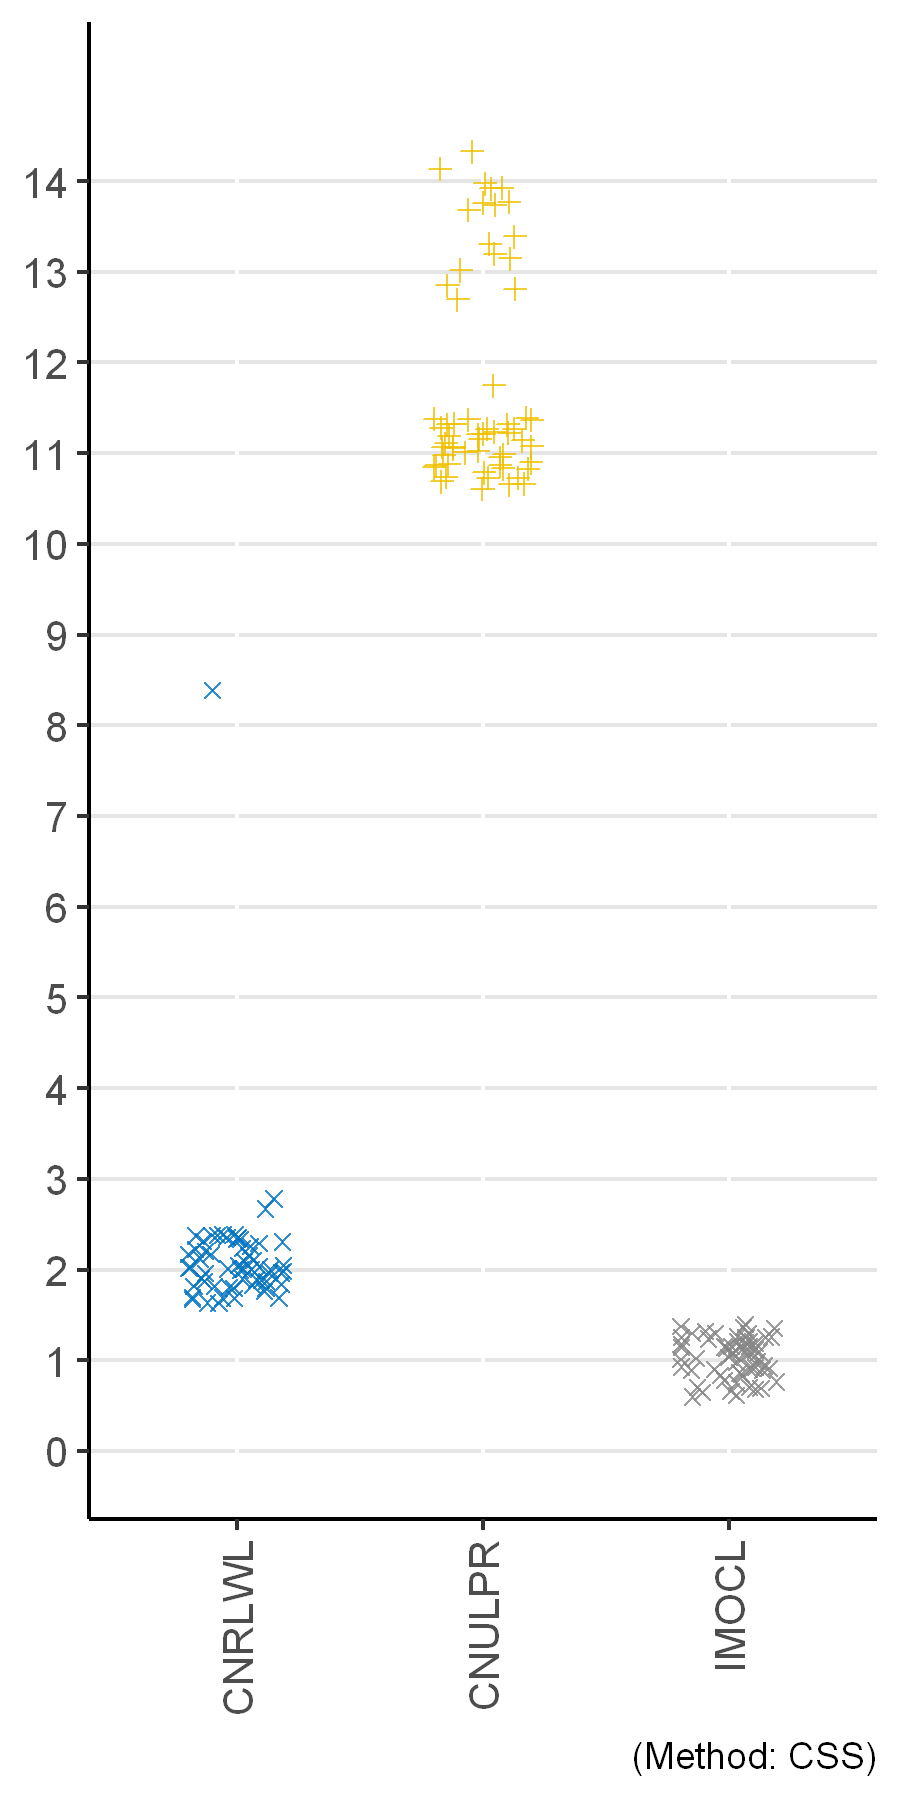

In [123]:
options(repr.plot.width=3, repr.plot.height=6,repr.plot.res =300)
g1 <-
df %>% filter (Method == "CSS") %>%
ggplot(aes(Operation,k_14))+geom_jitter(alpha = 0.8,width = 0.2,aes(color = Operation, shape = Region))+
scale_y_continuous(limits = c(0,15),breaks = c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14))+
scale_shape_manual(values=c(4,3))+
labs(caption = "(Method: CSS)")+
#scale_colour_hue()+
scale_color_jco()+
            theme(axis.text.x = element_text(angle = 90, hjust = 1,vjust =0.5),
                  axis.title.x = element_blank(),
                  axis.title.y = element_blank(),
                  axis.text = element_text(size = 10), 
                  axis.title = element_text(size = 10),
                  panel.background = element_rect(fill = "white"),
                  axis.line = element_line(size = 0.5),
                  legend.key = element_blank(),
                  legend.position = "none",
                  panel.grid.major.y = element_line(color = "grey90"))
g1

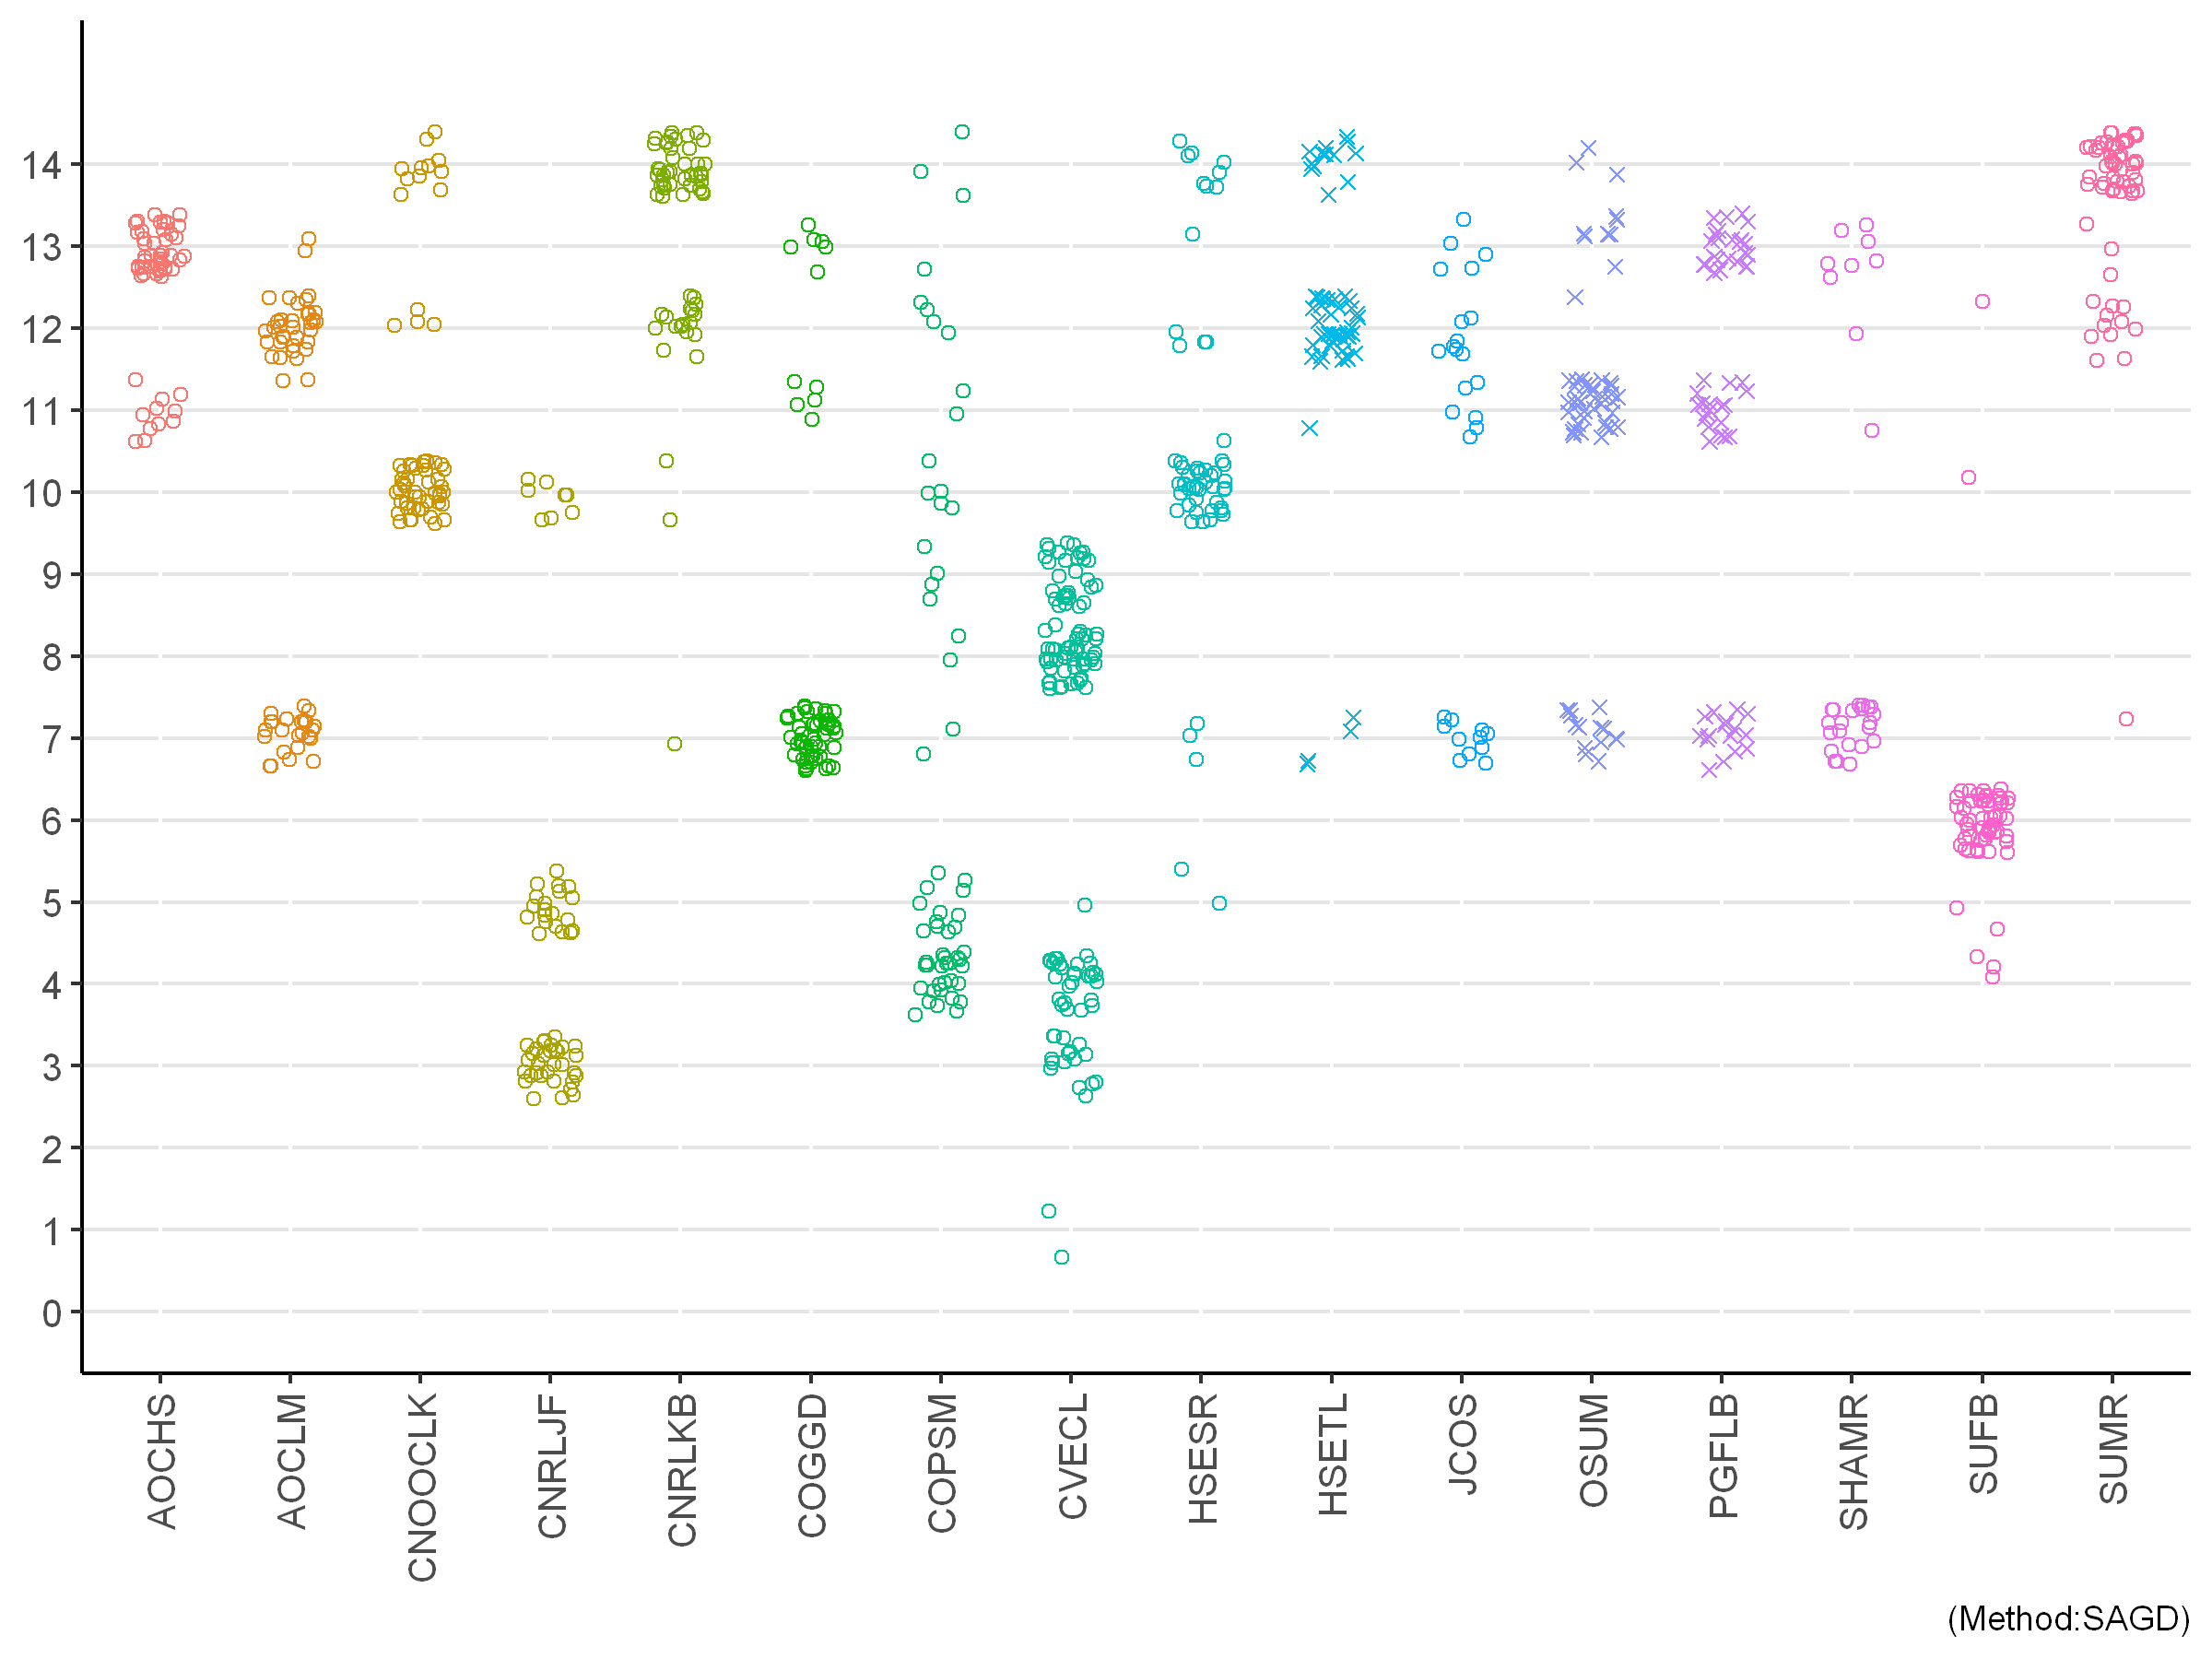

In [122]:
options(repr.plot.width=8, repr.plot.height=6,repr.plot.res =300)
g2 <-
df %>% filter (Method == "SAGD") %>%
ggplot(aes(Operation,k_14))+geom_jitter(alpha = 1,width = 0.2,aes(color = Operation, shape = Region))+
scale_color_hue()+
labs(caption = "(Method:SAGD)")+
# scale_color_viridis(discrete = TRUE, option = "D")+
#  scale_fill_viridis(discrete = TRUE) +
scale_shape_manual(values=c(1,4))+
scale_y_continuous(limits = c(0,15),breaks = c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14))+
            theme(axis.text.x = element_text(angle = 90, hjust = 1,vjust =0.5),
                  axis.title.x = element_blank(),
                  axis.title.y = element_blank(),
                  axis.text = element_text(size = 10), 
                  axis.title = element_text(size = 10),
                  panel.background = element_rect(fill = "white"),
                  axis.line = element_line(size = 0.5),
                  legend.key = element_blank(),
                  legend.position = "none",
                  panel.grid.major.y = element_line(color = "grey90"))
g2

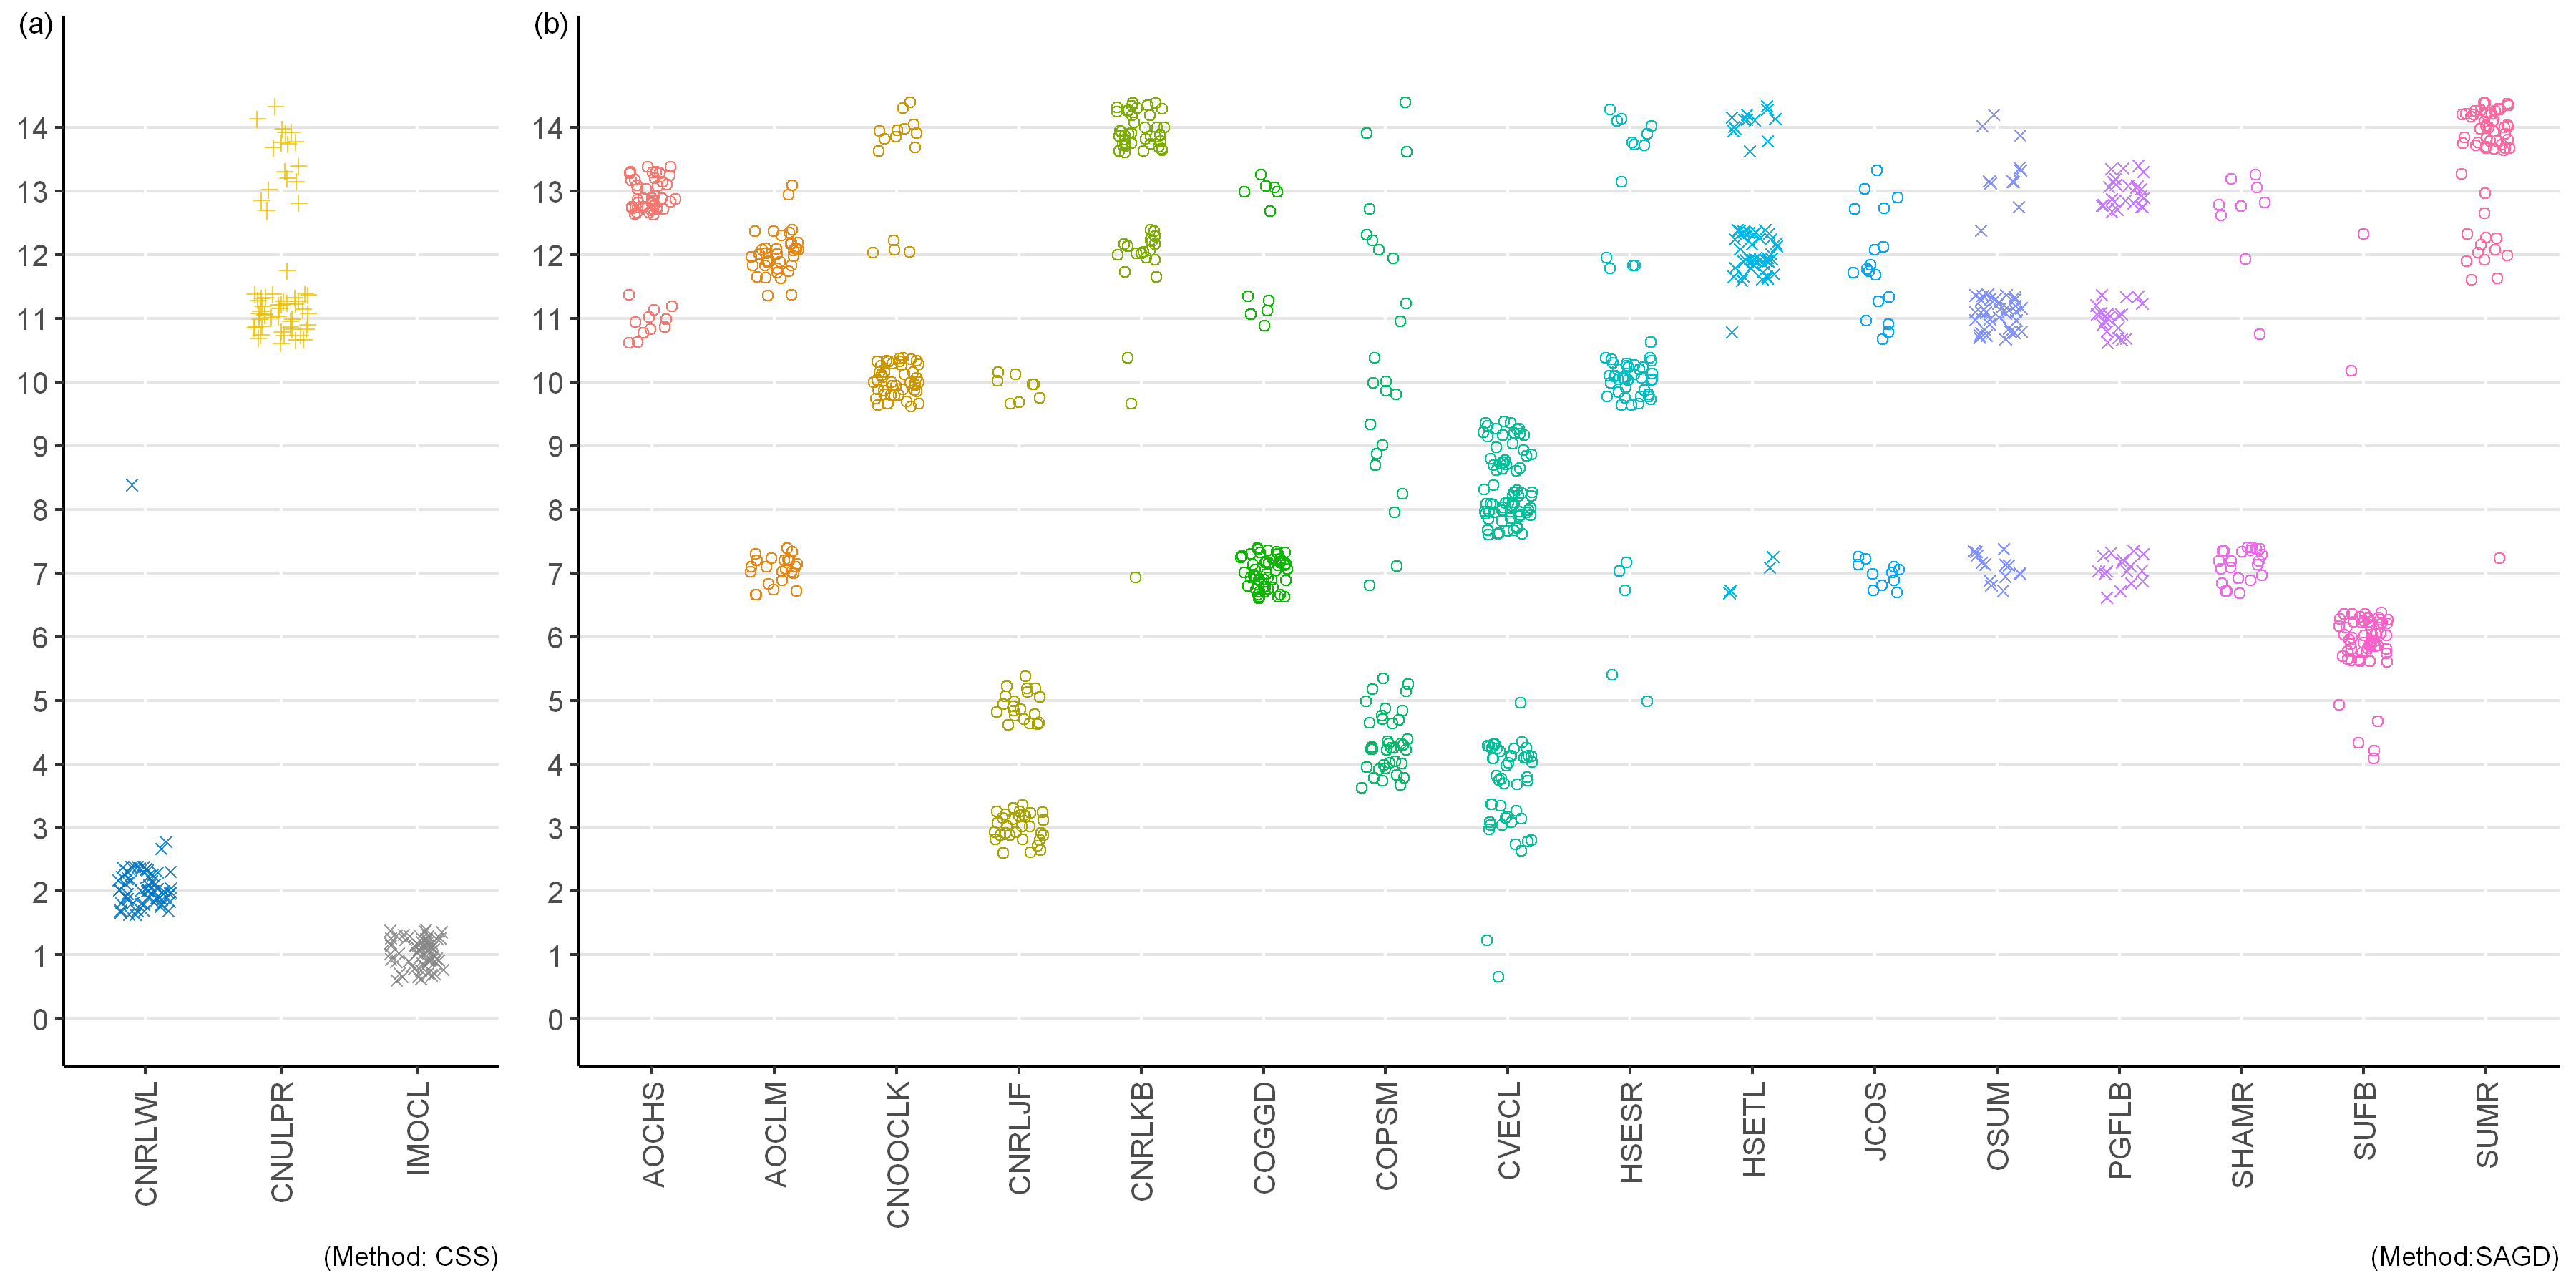

In [124]:
options(repr.plot.width=12, repr.plot.height=6,repr.plot.res =300)
Trend = ggarrange(
    g1,
    g2,
    labels = c("(a)","(b)"),
    font.label = list(size = 10, face = "plain"),
    ncol = 2,
    nrow = 1,
    widths = c(2,8),
    align = "h"
)
Trend

In [125]:
ggsave(Trend, filename = "Clustering.pdf", width = 12, height = 6, unit = "in",dpi = 320)
ggsave(Trend, filename = "Clustering.png", width = 12, height = 6, unit = "in",dpi = 320)